In [1]:
import json
import requests
import plotly.express as px
import difflib
import geopandas as gpd

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import matplotlib.colors as mcolors

import holoviews as hv
from chord import Chord
from wordcloud import WordCloud

# Sakey Plot

In [2]:
df = pd.read_csv("datasets/sankey.csv")
df.head(2) # require long data

FROM        TO  VALUE
0  Brazil  Portugal      5
1  Brazil    France      1

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
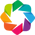

:Sankey   [FROM,TO]   (VALUE)

In [3]:
hv.extension('bokeh')
df = pd.read_csv("datasets/sankey.csv")
sakey = hv.Sankey(df, kdims=["FROM", "TO"], vdims=["VALUE"])

sakey.opts(cmap='Spectral',
           label_position='right',
           edge_color='FROM', 
           edge_line_width=0.5,
           edge_alpha= 0.8,
           node_alpha=0.5, 
           node_width=10,
           node_sort=True,

           width=1100, height=500, 
           bgcolor="white", 
           margin=0, padding=0,
           title="My Fancy Sankey Plot")


# Circos Plot

In [4]:
circos = pd.read_excel("datasets/migration.xlsx", skiprows= 1)
circos = pd.read_excel("datasets/migration.xlsx", skiprows= 1)
circos.drop(columns = ['Unnamed: 0', "Unnamed: 17"], inplace=True)
circos.rename(columns = {'Unnamed: 1': 'Origin'}, inplace=True)
circos.set_index("Origin", inplace=True)
print(circos.shape) # square matrix!
circos.head(2)

(15, 15)


North America  Central America  South America  North Africa  \
Origin                                                                         
North America            96102           208668          68240          4253   
Central America        3233173           215008          36975           390   

                 Sub-Saharan Africa  Northern Europe  Western Europe  \
Origin                                                                 
North America                 58827           248379          279267   
Central America                2414            42572           81356   

                 Southern Europe  Eastern Europe  Central Asia  Western Asia  \
Origin                                                                         
North America             551959          162959         85259        131288   
Central America           190931            4962          3145          6236   

                 South Asia  East Asia  South-East Asia  Oceania  
Origin                                                            
North America           158      39145            41758    52303  
Central America          14       1754              510     7541

In [5]:
names=list(circos.columns)
df = circos.values.tolist()

circos = Chord(df, names, 
              font_size_large='10px', 
              wrap_labels=False, 
              margin=100,
              width=800)

# only way to display is save it and load after
circos.to_html('circos.html')

# Stacked barchart

In [6]:
colors= list(mcolors.TABLEAU_COLORS.values())
df = pd.read_excel("datasets/census.xlsx",)
df.drop(columns=["Unnamed: 23"], inplace=True)
df_bar = df.loc[:, df.mean() > 4000].transpose().reset_index()
df_bar = df.transpose().reset_index().loc[1:,:]
df_bar.columns = ['region'] + df.ANNI.values.tolist() 
df_bar.region.iloc[1] = "Valle d'Aosta"
df_bar.region.iloc[4]='Trentino-Alto Adige'
df.head(2)

c:\users\dell\venv\jupyter\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ANNI  Piemonte  Valle d'Aosta-Vallée d'Aoste   Liguria  Lombardia  \
0  1951   3518.00                        94.000  1567.000   6566.000   
1  1961   3914.25                       100.959  1735.349   7406.152   

   Trentino-Alto Adige/Südtirol  Bolzano-Bozen   Trento    Veneto  \
0                       729.000        334.000  395.000  3918.000   
1                       785.967        373.863  412.104  3846.562   

   Friuli-Venezia Giulia  ...    Marche     Lazio   Abruzzo   Molise  \
0               1226.000  ...  1364.000  3341.000  1277.000  407.000   
1               1204.298  ...  1347.489  3958.957  1206.266  358.052   

   Campania    Puglia  Basilicata  Calabria   Sicilia  Sardegna  
0  4346.000  3220.000     628.000  2044.000  4487.000  1276.000  
1  4760.759  3421.217     644.297  2045.047  4721.001  1419.362  

[2 rows x 23 columns]

In [7]:
m=df_bar.transpose()
m.columns = m.iloc[0,:]
m = m.iloc[1:]
sum_over_all_years=m.sum().reset_index(name='tot')
sum_over_all_years.sort_values(by='tot',inplace=True)
sum_over_all_years.head(2)

region       tot
1   Valle d'Aosta   778.313
15         Molise  2378.313

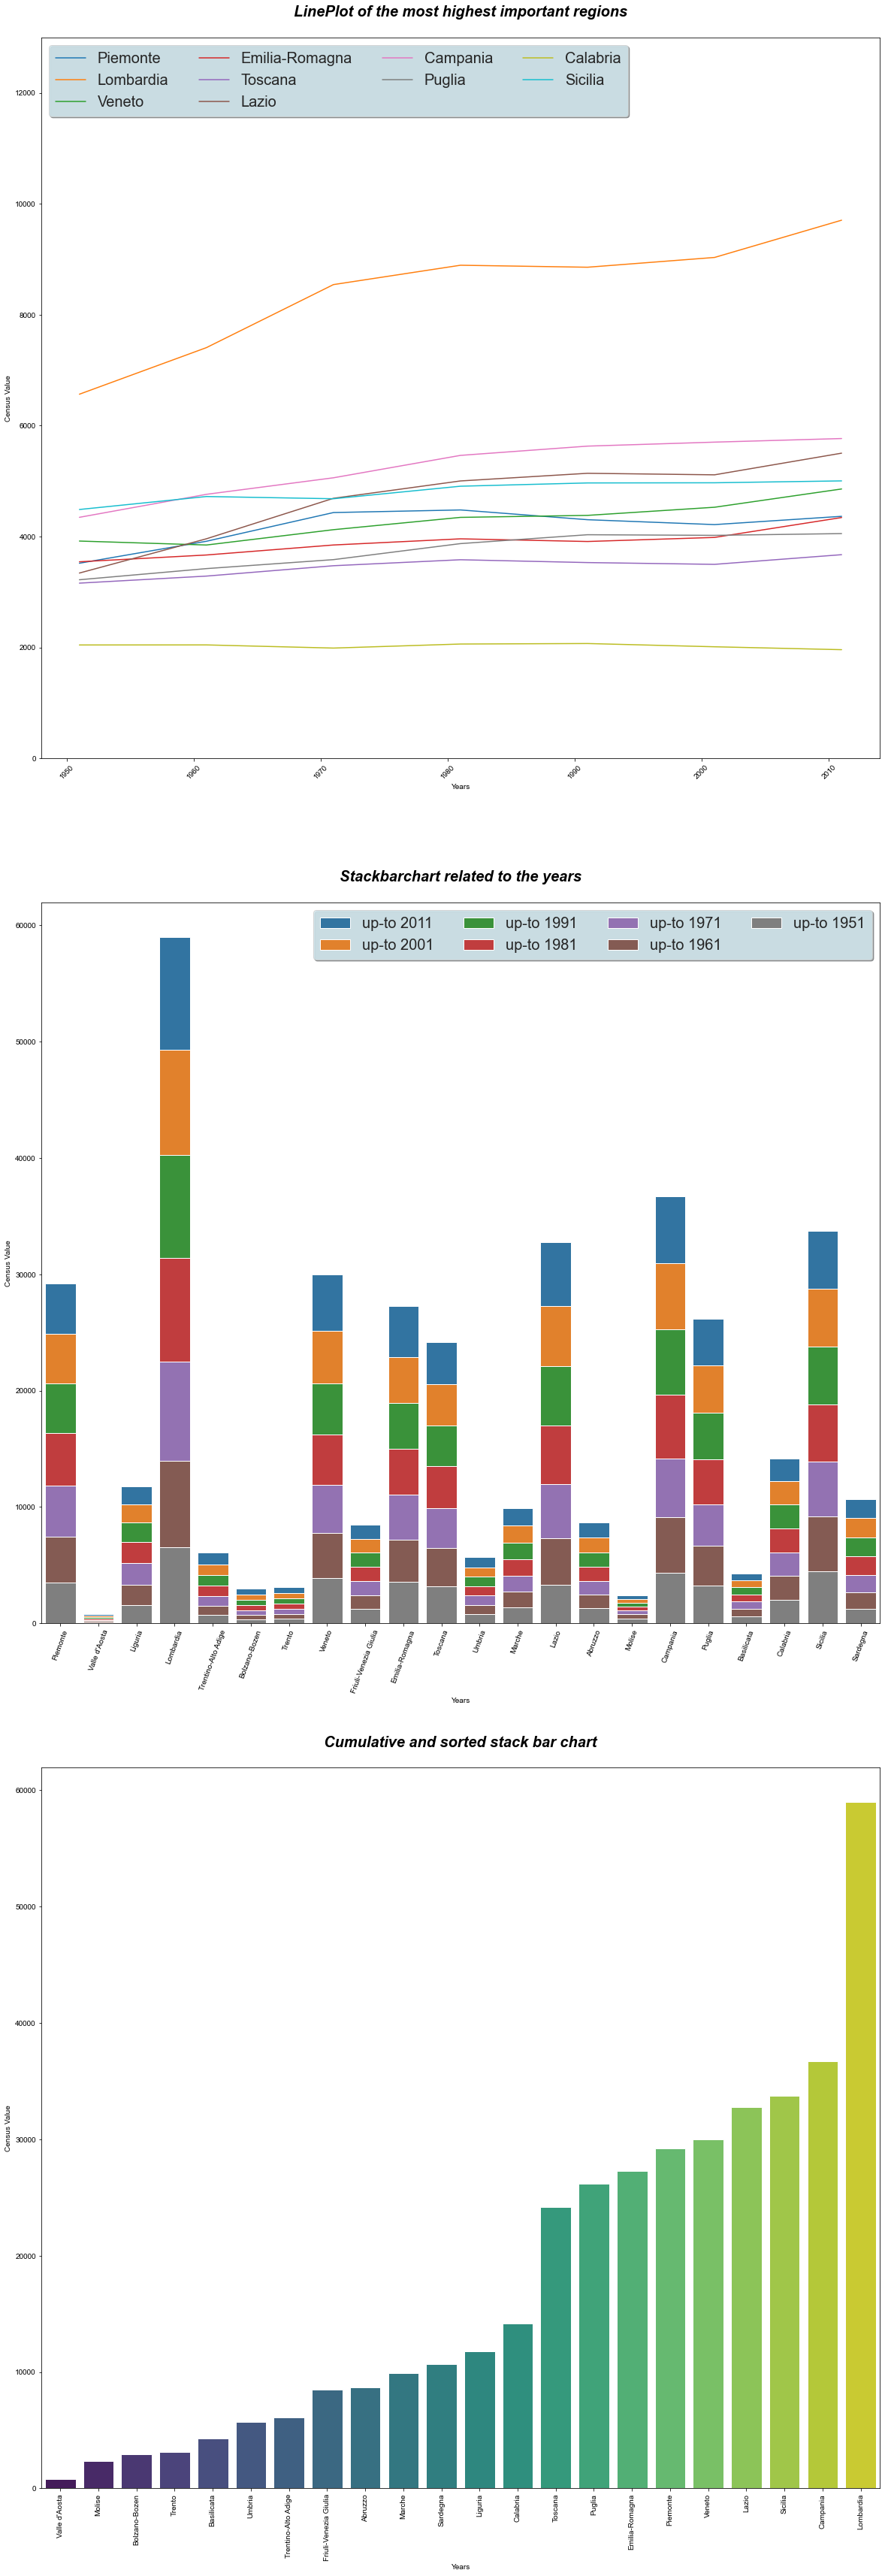

In [8]:
fig, axes = plt.subplots(3,1,figsize= (20,60))
sns.set_style("white")

#lineplot over 2000
for region in df.columns.values[1:]:
    if df[region].mean() > 2000: # decide to work only if the the mean of the region is over 2000!
        sns.lineplot(ax=axes[0], data=df, x = 'ANNI', y= region, label=region)
        
title = "LinePlot of the most highest important regions"
ylabel = "Value"
xlabel= "Year"
style_title= dict(size=20, weight='bold', style='italic')
style_labels = dict(size=15, style='italic')
axes[0].set_title(title +"\n",   fontdict=style_title)
axes[0].set_ylabel("Census Value")
axes[0].set_xlabel("Years")
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)
axes[0].legend(loc='upper left', ncol=4, 
           fontsize=20, shadow=True, 
           facecolor= '#d4ebf2', 
           framealpha=0.8, borderpad=0.45)
axes[0].set_ylim(0,13000)

        
# stacked area chart with palette
palette= "tab10"
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961]+df_bar[1971] + df_bar[1981] + df_bar[1991] + df_bar[2001] + df_bar[2011], color=colors[0],label='up-to 2011')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961]+df_bar[1971] + df_bar[1981] + df_bar[1991] + df_bar[2001], color=colors[1],label='up-to 2001')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961]+df_bar[1971] + df_bar[1981] + df_bar[1991], color=colors[2],label='up-to 1991')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961]+df_bar[1971] + df_bar[1981], color=colors[3],label='up-to 1981')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961]+df_bar[1971], color=colors[4],label='up-to 1971')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = df_bar[1951]+df_bar[1961], color=colors[5],label='up-to 1961')
sns.barplot(ax=axes[1], data=df_bar, x='region', 
            y = 1951,color=colors[7], label='up-to 1951')
    
title = "Stackbarchart related to the years"
ylabel = "Value from 1951 to 2011"
xlabel= "region"
style_title= dict(size=20, weight='bold', style='italic')
style_labels = dict(size=15, style='italic')
axes[1].set_title(title +"\n",   fontdict=style_title)
axes[1].set_ylabel("Census Value")
axes[1].set_xlabel("Years")
for tick in axes[1].get_xticklabels():
    tick.set_rotation(70)
    
axes[1].legend(loc='best', ncol=4, 
           fontsize=20, shadow=True, 
           facecolor= '#d4ebf2', 
           framealpha=0.8, borderpad=0.45)

# last cumulatived and sorted
sns.barplot(ax=axes[2], data= sum_over_all_years, x='region', y='tot', palette='viridis')
title = "Cumulative and sorted stack bar chart"
ylabel = "Value from 1951 to 2011"
xlabel= "region"
style_title= dict(size=20, weight='bold', style='italic')
style_labels = dict(size=15, style='italic')
axes[2].set_title(title +"\n",   fontdict=style_title)
axes[2].set_ylabel("Census Value")
axes[2].set_xlabel("Years")
for tick in axes[2].get_xticklabels():
    tick.set_rotation(90)

    
# txt="Each stack represents a ten years count"
# axes[1].text(4.5, 60000, txt, wrap=True, horizontalalignment='center', 
#              fontdict=(dict(size=25,style='italic', color='tab:blue')))

plt.show()

# Marginal Plot

In [9]:
iris = pd.read_csv("datasets/iris.csv")
iris.head(2)

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa

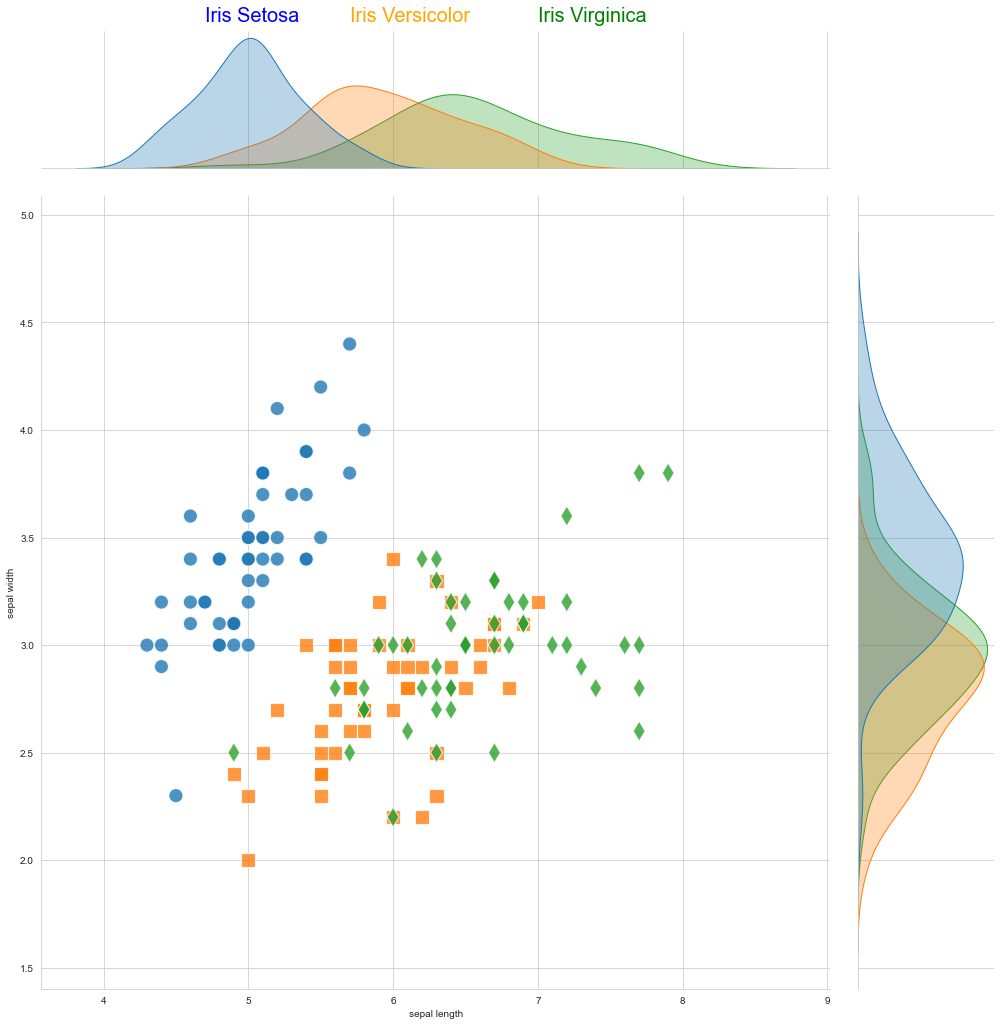

In [10]:
sns.set_style("whitegrid")

g1 = sns.jointplot(data=iris,
              x = "sepal length",
              y="sepal width",
              ratio =5,
              hue='class',
              legend=False,
              height=14,
              dropna=True,
              joint_kws=  {"alpha":0.8,"s":200,  # <- !
                           'style': iris['class'],
                           "markers" : ['o','s','d']},
              marginal_kws= dict(alpha=0.3))

g1.ax_joint.text(x=4.7,y=5.9,s='Iris Setosa', fontdict=(dict(size=20, color='blue')))
g1.ax_joint.text(x=5.7,y=5.9,s='Iris Versicolor', fontdict=(dict(size=20, color='orange')))
g1.ax_joint.text(x=7,y=5.9,s='Iris Virginica', fontdict=(dict(size=20, color='green')))

plt.show()

## Line Plot

In [11]:
df = pd.read_csv("datasets/economist_data.csv")
df.head(2)

Country  HDI.Rank    HDI  CPI             Region
0  Afghanistan       172  0.398  1.5       Asia Pacific
1      Albania        70  0.739  3.1  East EU Cemt Asia

In [12]:
def text_scatter_xy(data, _x, _y, _s, space_x =0.3 , space_y=0.2, fontdict=None):
    for idx in range(len(data)):
        x = data[_x].iloc[idx]
        y = data[_y].iloc[idx]
        s = str(data[_s].iloc[idx])
        
        plt.text(x= x + space_x,
                 y= y + space_y, 
                 s= s,
                 horizontalalignment='left',
                 fontdict = fontdict)

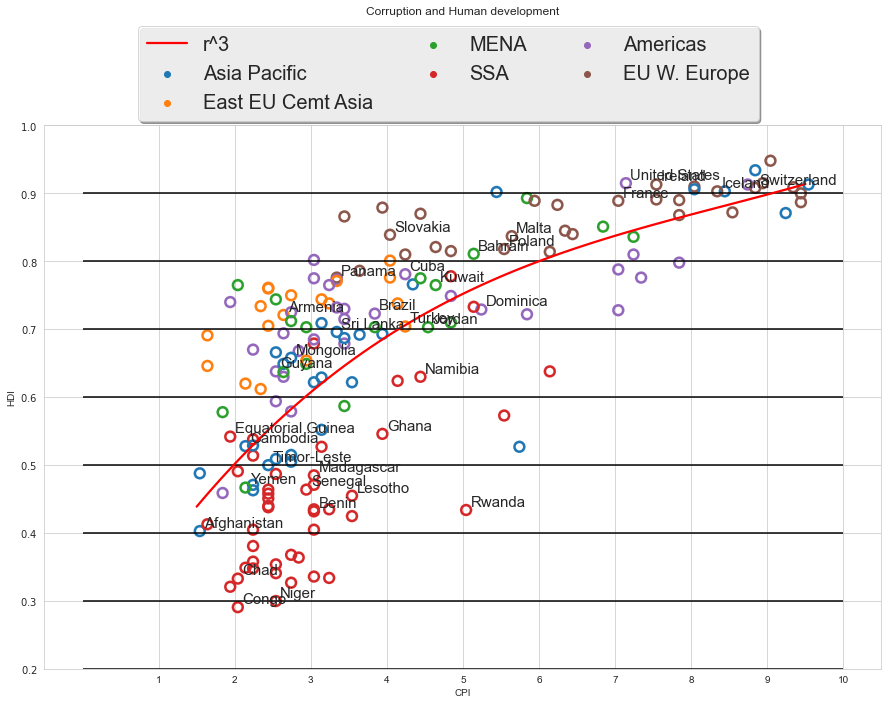

In [13]:
fig = plt.figure(figsize=(15,10))
sns.set_style("whitegrid")


g1 = sns.scatterplot(data=df, x='CPI', y='HDI', hue='Region', s=350,
                marker="$\circ$", edgecolor="face", linewidth=0.1)

sns.regplot(data=df, 
            x='CPI', 
            y='HDI', 
            order=3,
            ci=0,
            scatter_kws=dict(alpha=0.0), 
            line_kws= dict(color='red',label='r^3'),
             )

ticks_y = [i for i in np.arange(0.2,1.001,.1)]
label_y = [f"${str(round(i,1))}$" for i in np.arange(0.2,1.001,.1)]

ticks_x = [i for i in range(1,11)]
label_x = [f"${str(round(i,1))}$" for i in np.arange(1,11)]

plt.xticks(ticks= ticks_x, label=label_x, rotation=0)
plt.yticks(ticks= ticks_y, labels=label_y, rotation=0)

ylabel = "HDI"
xlabel= "CPI"

plt.ylabel(ylabel)
plt.xlabel(xlabel)

plt.hlines(y =np.arange(0,1,.1) ,
           xmin= 0, xmax=10, 
           color='black')

plt.legend(loc='upper left', ncol=3, 
           fontsize=20, shadow=True, 
           facecolor= 'white', 
           framealpha=0.8, borderpad=0.45,
           bbox_to_anchor=(0.10, 1.2))

plt.title("Corruption and Human development"+ "\n"*9)
plt.ylim(0.2,1)

annotation_dict= dict(size=15)
text_scatter_xy(df[::5], _x="CPI", _y="HDI", _s="Country", space_x=0.1, space_y=0.01,fontdict=annotation_dict)

plt.show()

# Word Cloud

In [14]:
with open('datasets/license.txt', 'r') as f:
    text= (f.read())

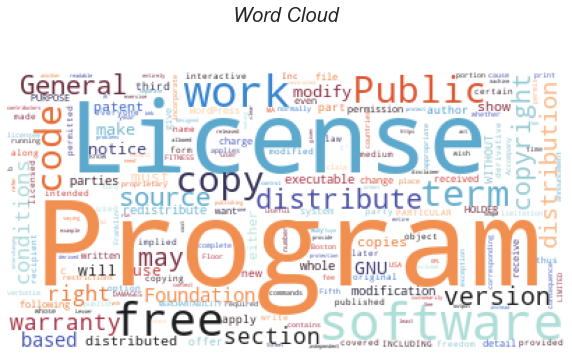

In [15]:
fig = plt.figure(figsize=(10,10))


wordcloud = WordCloud(margin=0,
                      background_color ='white',
                      stopwords=None,
                      colormap='icefire',
                      collocation_threshold=300)

word_clouded = wordcloud.generate(text)


plt.imshow(word_clouded)
plt.margins(x=0, y=0)
plt.axis("off")
plt.title('Word Cloud\n\n',fontdict=dict(size=20, style='italic'))
plt.show()